In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
url='https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv'
data=pd.read_csv(url)

In [90]:
#Выводит первые 5 строк
print(data.head(), '\n')
#Показывает общую инфу, тип объекта, количество строк, используемую память и т.д.
print(data.info(), '\n')
#Статистика по числовым данным
data.describe()

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None 



,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [91]:
print(data.head(n=10).isna())
#Вычисляет долю пропущенных значений
data.isna().mean()

   user_id    age  country  purchases  revenue
0    False  False    False      False    False
1    False  False    False      False    False
2    False  False    False      False    False
3    False  False    False      False    False
4    False   True    False      False    False
5    False  False    False      False    False
6    False  False    False      False    False
7    False  False    False      False    False
8    False  False    False      False    False
9    False  False    False      False    False


,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


In [92]:
#Наличие полностью дублирующих строк
data.duplicated()
#можем видеть, что дублируется строка 40

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [93]:
#подозрительные случаи

#Так мы видим сказу, где отричательное значение, если делать проверку наоборот >= 0, то можно запутаться, т.к. False будет показыватт, там где у нас нет значения (nan)
colums_check=data[['user_id','age', 'purchases', 'revenue']]
print((colums_check < 0))

    user_id    age  purchases  revenue
0     False  False      False    False
1     False  False      False    False
2     False  False      False    False
3     False  False      False    False
4     False  False      False    False
5     False  False       True    False
6     False  False      False    False
7     False  False      False    False
8     False  False      False    False
9     False  False      False    False
10    False  False      False    False
11    False  False      False    False
12    False  False      False    False
13    False  False      False    False
14    False  False      False    False
15    False  False      False    False
16    False  False      False    False
17    False  False      False    False
18    False  False      False    False
19    False  False      False    False
20    False  False      False    False
21    False  False      False    False
22    False  False      False    False
23    False  False      False    False
24    False  False      F

In [94]:
#Проверяем возраст и выводим значение
for age in data['age']:
  print(age>100)
  if age > 100:
    print(f"Возраст {age} > 100 ")


False
False
False
False
False
True
Возраст 120.0 > 100 
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [95]:
#Находим противоречие что при наличии покупок доход не может оставаться нулевым и выводим инфо о пользователе с противоречием, а именно оказался пользователь с id 11
print(data[(data['purchases'] > 0) & (data['revenue'] == 0)])

    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


In [96]:
#Сначала мы посчитали сколько разных стран встресается у нас в данных, а потом перепроверили перез группировку, результаты совпали. Люди из России доминируют в таблице, французы почти не отстают разница в 1 человека.
print(data['country'].value_counts())
ru_count=data.groupby('country').size().get('RU')
print(ru_count)

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
13


In [97]:
#Сколько людей в разных возрастных группах имеют доход больще 1000? Мы видим, что одинаковое количество людей из группы <30 и 31-40 заработали юольше 1000. Неожтданно много люднй до 30 хорошо заработали.

age_bins = [0, 30, 40, 50, 200]
age_labels = ['≤30', '31-40', '41-50', '50+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

success = data[data['revenue'] > 1000].groupby('age_group').size()
print(success)

age_group
≤30      5
31-40    5
41-50    1
50+      1
dtype: int64


/tmp/ipython-input-3608263512.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success = data[data['revenue'] > 1000].groupby('age_group').size()


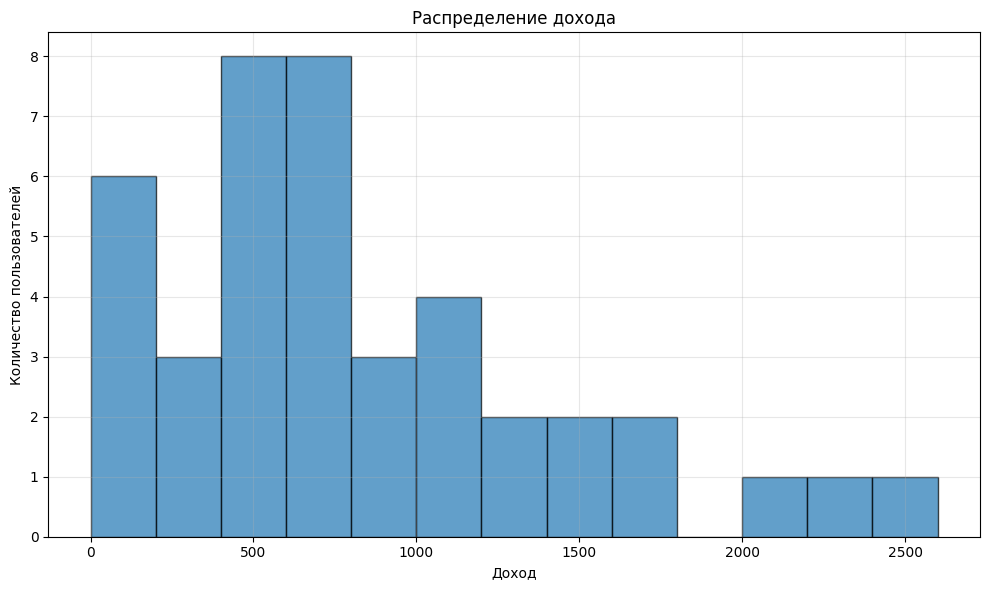

<Figure size 640x480 with 0 Axes>

In [115]:
df = pd.DataFrame(data, columns=['user_id', 'age', 'country', 'purchases', 'revenue'])

fig, ax = plt.subplots(figsize=(10, 6))
bins_revenue = np.arange(0, y.max() + 200, 200)
ax.hist(y, bins=bins_revenue, edgecolor='black', alpha=0.7)

ax.set_title('Распределение дохода')
ax.set_xlabel('Доход')
ax.set_ylabel('Количество пользователей')
ax.grid(True, alpha=0.3)

# Эта гистограмма показывает сколько людей имеют доход в определенном диапазоне, мы можем видеть что большинство людей имеют доход от ~450 до ~800 что можно считать средним, а вот доход свыше 2000 имеют единицы.
plt.tight_layout()
plt.show()
plt.savefig('homeworks/HW02/figures/histogram.png')

/tmp/ipython-input-2349276314.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=df['country'].unique())


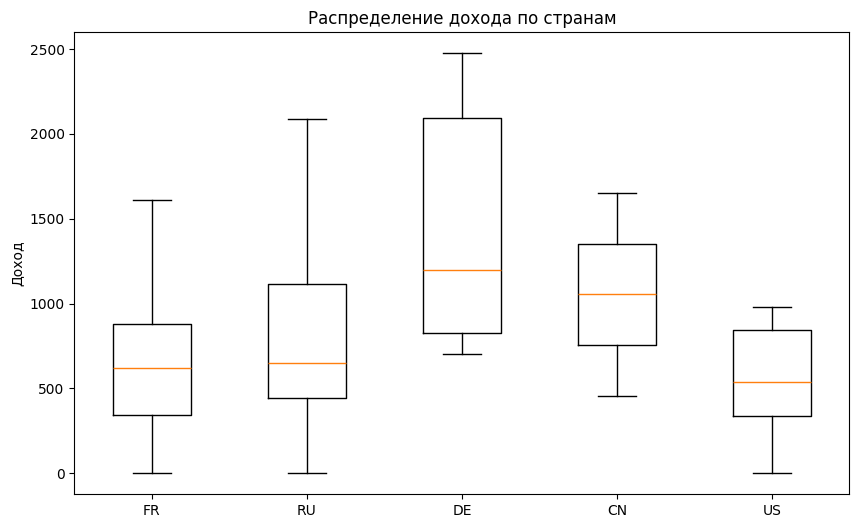

<Figure size 640x480 with 0 Axes>

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))
data_to_plot = [df[df['country'] == country]['revenue'].dropna()
                for country in df['country'].unique()]
ax.boxplot(data_to_plot, labels=df['country'].unique())
ax.set_title('Распределение дохода по странам')
ax.set_ylabel('Доход')
plt.show()
plt.savefig('homeworks/HW02/figures/histogram.png')
# несмотря на то, что в предыдущем анализе мы увидели, что большинство людей из России и Франции, то эта диаграмма удивляет тем, что большая часть прибыли сосредоточена в DE

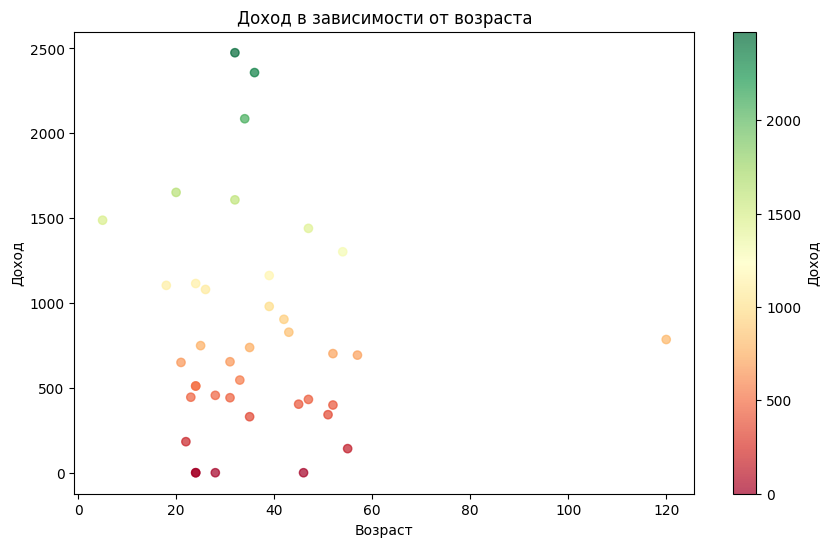

<Figure size 640x480 with 0 Axes>

In [117]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df['age'], df['revenue'], c=df['revenue'], cmap='RdYlGn', alpha=0.7)
ax.set_title('Доход в зависимости от возраста')
ax.set_xlabel('Возраст')
ax.set_ylabel('Доход')
plt.colorbar(scatter, label='Доход')
plt.show()
plt.savefig('homeworks/HW02/figures/histogram.png')
# Мы можем сделать вывод, что люди зарабатывают больше всего в возрасте от 30 до 40